<a href="https://www.kaggle.com/code/dheeraj1532/ipl-auction-2024-eda?scriptVersionId=163389798" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-2024-auction-data/TOP_BUYS.csv
/kaggle/input/ipl-2024-auction-data/UNSOLD_PLAYERS.csv
/kaggle/input/ipl-2024-auction-data/IPL_PLAYERS.csv


Sold Players Exploratory Data Analysis

In [2]:
buys=pd.read_csv('/kaggle/input/ipl-2024-auction-data/IPL_PLAYERS.csv')

In [3]:
buys.head()

,PLAYERS,NATIONALITY,TYPE,PRICE PAID,TEAM
0,Avanish Rao Aravelly,Indian,Wicket-Keeper,2000000,CSK
1,Mustafizur Rahman,Overseas,Bowler,20000000,CSK
2,Daryl Mitchell,Overseas,All-Rounder,140000000,CSK
3,Sameer Rizvi,Indian,Batter,84000000,CSK
4,Rachin Ravindra,Overseas,All-Rounder,18000000,CSK


In [4]:
buys.tail()

,PLAYERS,NATIONALITY,TYPE,PRICE PAID,TEAM
67,Akash Singh,Indian,Bowler,2000000,SH
68,Jaydev Unadkat,Indian,Bowler,16000000,SH
69,Wanindu Hasaranga,Overseas,All-Rounder,15000000,SH
70,Pat Cummins,Overseas,All-Rounder,205000000,SH
71,Travis Head,Overseas,Batter,68000000,SH


In [5]:
buys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PLAYERS      72 non-null     object
 1   NATIONALITY  72 non-null     object
 2   TYPE         72 non-null     object
 3   PRICE PAID   72 non-null     int64 
 4   TEAM         72 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.9+ KB


In [6]:
buys.describe()

,PRICE PAID
count,7.200000e+01
mean,3.200694e+07
std,4.659788e+07
min,2.000000e+06
25%,2.000000e+06
50%,1.250000e+07
75%,4.850000e+07
max,2.475000e+08


In [7]:
buys.isnull().sum()

PLAYERS        0
NATIONALITY    0
TYPE           0
PRICE PAID     0
TEAM           0
dtype: int64

In [8]:
buys['TEAM'].unique()

array(['CSK', 'DC', 'GT', 'KKR', 'LSG', 'MI', 'PK', 'RR', 'RCB', 'SH'],
      dtype=object)

In [9]:
buys.loc[buys['TEAM']=='SH','TEAM']='SRH'
buys['TEAM']=buys['TEAM'].replace('PK','PBKS')

In [10]:
buys['TEAM'].unique()

array(['CSK', 'DC', 'GT', 'KKR', 'LSG', 'MI', 'PBKS', 'RR', 'RCB', 'SRH'],
      dtype=object)

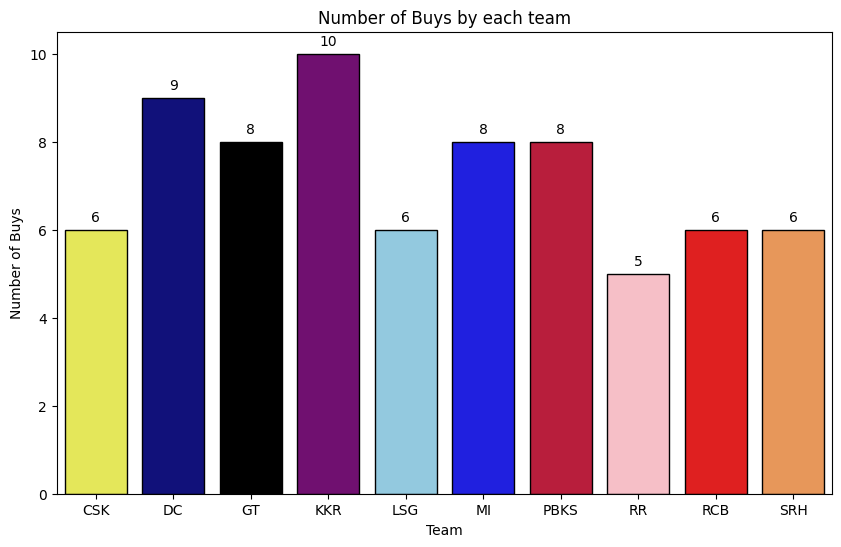

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
custom_colors = ['#FBFF42', 'DarkBlue', 'Black', 'Purple', 'SkyBlue', 'Blue', '#D2042D', 'LightPink', 'Red', '#FF9442']
plt.figure(figsize=(10, 6))
plt.title("Number of Buys by each team")
ax=sns.countplot(x='TEAM',data=buys,palette=custom_colors,edgecolor='black')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel('Team')
plt.ylabel('Number of Buys')
plt.show()


In [12]:
max(buys['PRICE PAID'])

247500000

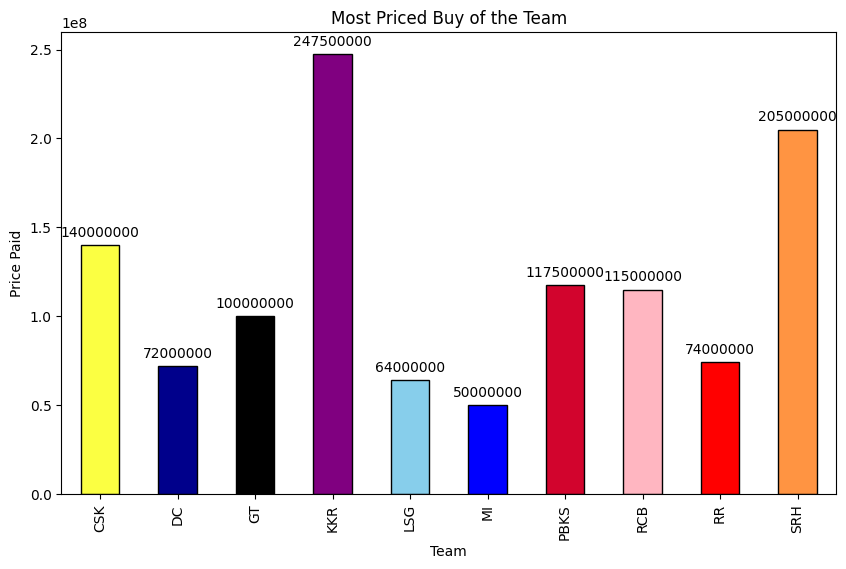

In [13]:
max_price_per_team = buys.groupby('TEAM')['PRICE PAID'].max()
plt.figure(figsize=(10,6))
ax=max_price_per_team.plot(kind='bar',color=custom_colors,edgecolor='black')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.title("Most Priced Buy of the Team")
plt.xlabel("Team")
plt.ylabel("Price Paid")
plt.show()

In [14]:
buys[buys['TEAM']=='CSK']

,PLAYERS,NATIONALITY,TYPE,PRICE PAID,TEAM
0,Avanish Rao Aravelly,Indian,Wicket-Keeper,2000000,CSK
1,Mustafizur Rahman,Overseas,Bowler,20000000,CSK
2,Daryl Mitchell,Overseas,All-Rounder,140000000,CSK
3,Sameer Rizvi,Indian,Batter,84000000,CSK
4,Rachin Ravindra,Overseas,All-Rounder,18000000,CSK
5,Shardul Thakur,Indian,All-Rounder,40000000,CSK


In [15]:
Money_spent_by_each_team=buys.groupby('TEAM')['PRICE PAID'].sum()

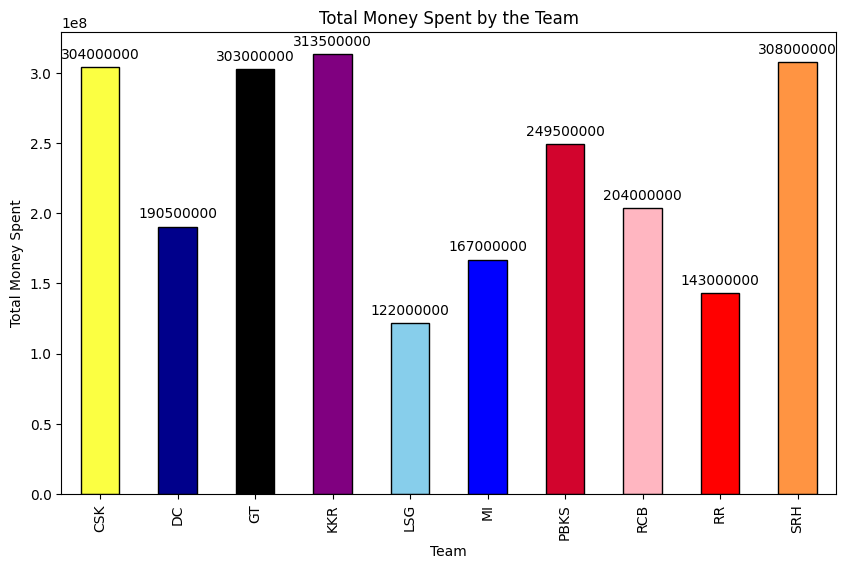

In [16]:
plt.figure(figsize=(10,6))
ax=Money_spent_by_each_team.plot(kind='bar',color=custom_colors,edgecolor='black')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.title("Total Money Spent by the Team")
plt.xlabel("Team")
plt.ylabel("Total Money Spent")
plt.show()

In [17]:
Highest_Paid_Foriegn_Player=buys[buys['NATIONALITY']=='Overseas'].loc[buys['PRICE PAID'].idxmax()]

In [18]:
Highest_Paid_Foriegn_Player

PLAYERS        Mitchell Starc
NATIONALITY          Overseas
TYPE                   Bowler
PRICE PAID          247500000
TEAM                      KKR
Name: 27, dtype: object

In [19]:
Highest_Paid_Indian_Player=buys.loc[buys[buys['NATIONALITY']=='Indian']['PRICE PAID'].idxmax()]


In [20]:
Highest_Paid_Indian_Player

PLAYERS        Harshal Patel
NATIONALITY           Indian
TYPE             All-Rounder
PRICE PAID         117500000
TEAM                    PBKS
Name: 54, dtype: object

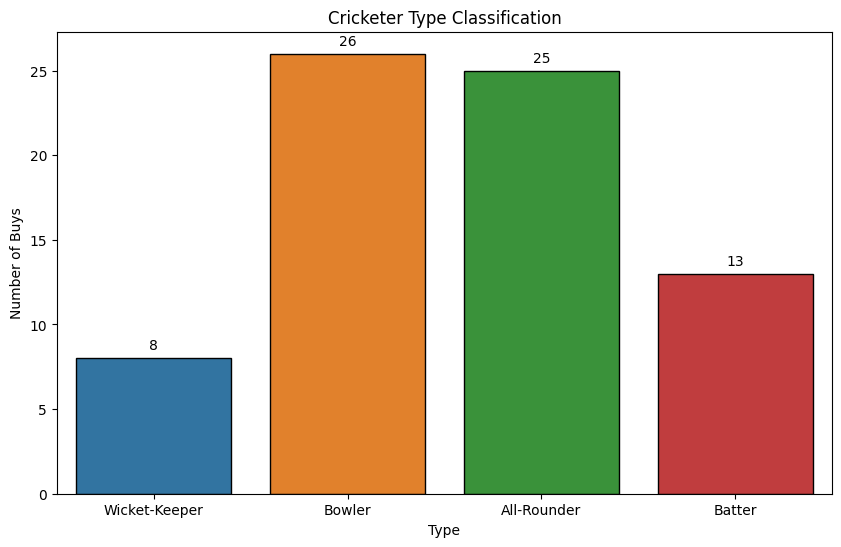

In [21]:
plt.figure(figsize=(10, 6))
plt.title("Cricketer Type Classification")
ax=sns.countplot(x='TYPE',data=buys,edgecolor='black')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel('Type')
plt.ylabel('Number of Buys')
plt.show()

In [22]:
Overseas=buys[buys['NATIONALITY']=='Overseas']
Overseas.head()

,PLAYERS,NATIONALITY,TYPE,PRICE PAID,TEAM
1,Mustafizur Rahman,Overseas,Bowler,20000000,CSK
2,Daryl Mitchell,Overseas,All-Rounder,140000000,CSK
4,Rachin Ravindra,Overseas,All-Rounder,18000000,CSK
9,Jhye Richardson,Overseas,Bowler,50000000,DC
10,Shai Hope,Overseas,Wicket-Keeper,7500000,DC


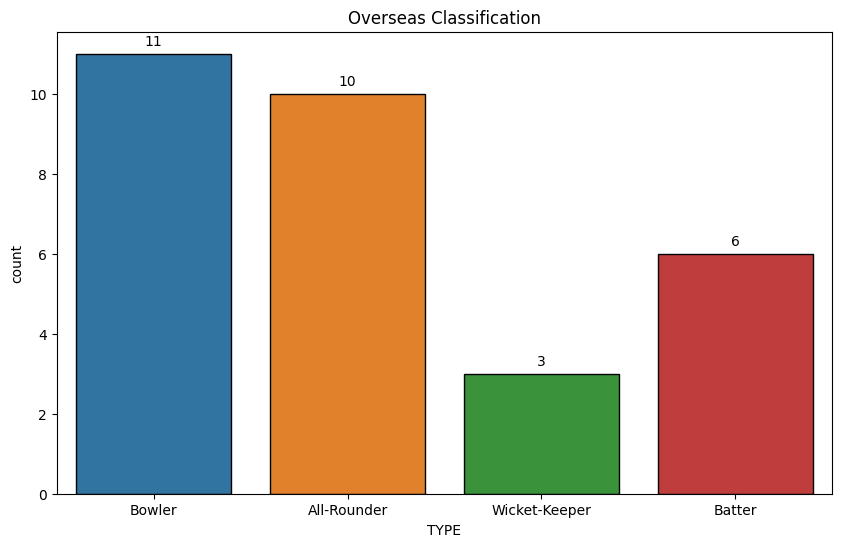

In [23]:
plt.figure(figsize=(10, 6))
plt.title("Overseas Classification")
ax=sns.countplot(x='TYPE',data=Overseas,edgecolor='black')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()

In [24]:
Indians=buys[buys['NATIONALITY']=='Indian']
Indians.head()

,PLAYERS,NATIONALITY,TYPE,PRICE PAID,TEAM
0,Avanish Rao Aravelly,Indian,Wicket-Keeper,2000000,CSK
3,Sameer Rizvi,Indian,Batter,84000000,CSK
5,Shardul Thakur,Indian,All-Rounder,40000000,CSK
6,Ricky Bhui,Indian,Wicket-Keeper,2000000,DC
7,Sumit Kumar,Indian,All-Rounder,10000000,DC


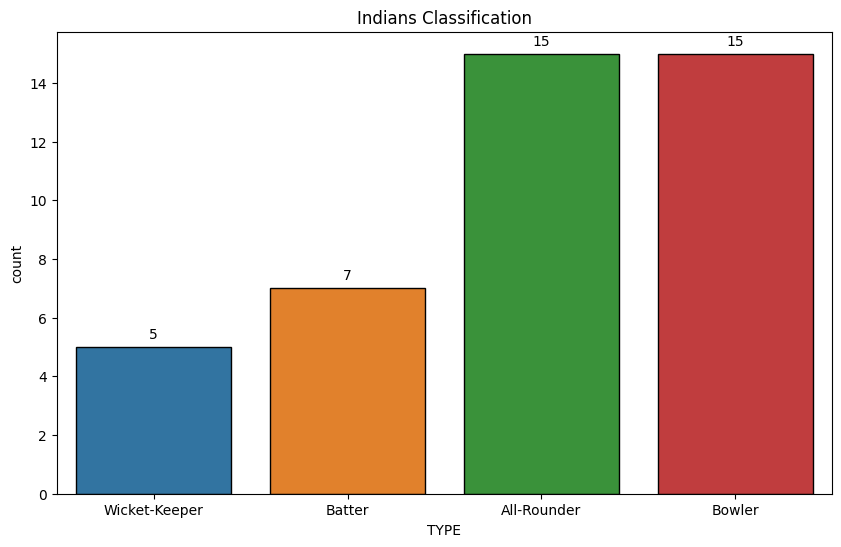

In [25]:
plt.figure(figsize=(10, 6))
plt.title("Indians Classification")
ax=sns.countplot(x='TYPE',data=Indians,edgecolor='black')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()

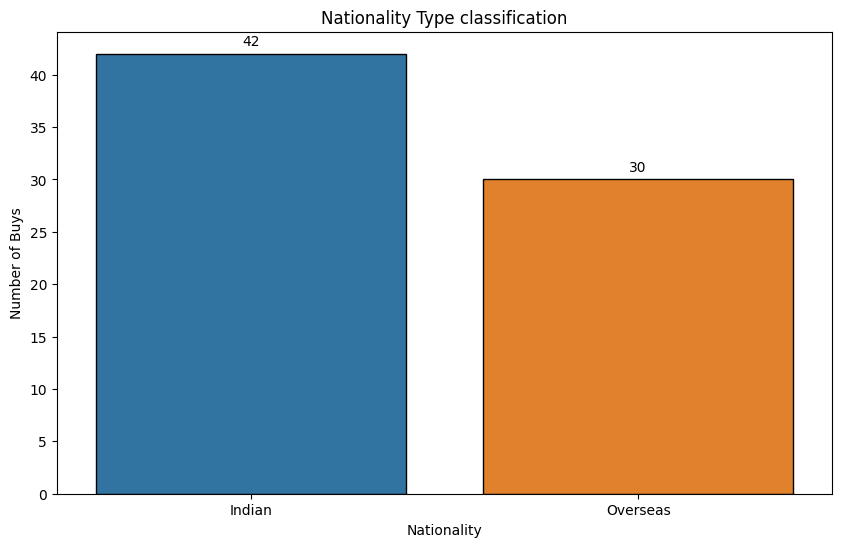

In [26]:
plt.figure(figsize=(10, 6))
plt.title("Nationality Type classification")
ax=sns.countplot(x='NATIONALITY',data=buys,edgecolor='black')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel('Nationality')
plt.ylabel('Number of Buys')
plt.show()

In [27]:
Highest_Paid_WK=buys.loc[buys[buys['TYPE']=='Wicket-Keeper']['PRICE PAID'].idxmax()]

In [28]:
Highest_Paid_WK

PLAYERS        Kumar Kushagra
NATIONALITY            Indian
TYPE            Wicket-Keeper
PRICE PAID           72000000
TEAM                       DC
Name: 12, dtype: object

In [29]:
Highest_Paid_Batter=buys.loc[buys[buys['TYPE']=='Batter']['PRICE PAID'].idxmax()]

In [30]:
Highest_Paid_Batter

PLAYERS        Sameer Rizvi
NATIONALITY          Indian
TYPE                 Batter
PRICE PAID         84000000
TEAM                    CSK
Name: 3, dtype: object

In [31]:
Highest_Paid_All=buys.loc[buys[buys['TYPE']=='All-Rounder']['PRICE PAID'].idxmax()]

In [32]:
Highest_Paid_All

PLAYERS        Pat Cummins
NATIONALITY       Overseas
TYPE           All-Rounder
PRICE PAID       205000000
TEAM                   SRH
Name: 70, dtype: object

In [33]:
Highest_Paid_Bowler=buys.loc[buys[buys['TYPE']=='Bowler']['PRICE PAID'].idxmax()]

In [34]:
Highest_Paid_Bowler

PLAYERS        Mitchell Starc
NATIONALITY          Overseas
TYPE                   Bowler
PRICE PAID          247500000
TEAM                      KKR
Name: 27, dtype: object

In [35]:
bat=buys[buys['TYPE']=='Batter']
bat

,PLAYERS,NATIONALITY,TYPE,PRICE PAID,TEAM
3,Sameer Rizvi,Indian,Batter,84000000,CSK
8,Swastik Chhikara,Indian,Batter,2000000,DC
14,Harry Brook,Overseas,Batter,40000000,DC
24,Manish Pandey,Indian,Batter,5000000,KKR
26,Angkrish Raghuvanshi,Indian,Batter,2000000,KKR
28,Sherfane Rutherford,Overseas,Batter,15000000,KKR
33,Ashton Turner,Overseas,Batter,10000000,LSG
51,Shashank Singh,Indian,Batter,2000000,PBKS
52,Rilee Rossouw,Overseas,Batter,80000000,PBKS
55,Shubham Dubey,Indian,Batter,58000000,RR


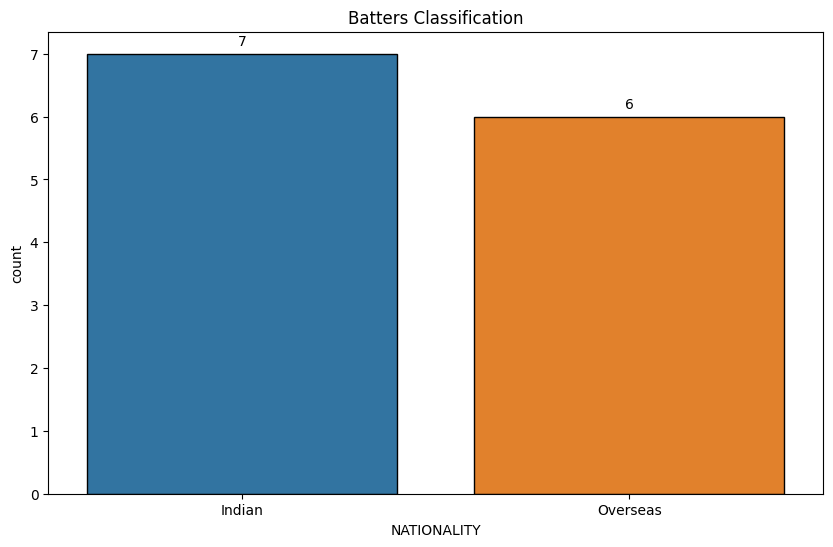

In [36]:
plt.figure(figsize=(10, 6))
plt.title("Batters Classification")
ax=sns.countplot(x='NATIONALITY',data=bat,edgecolor='black')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()


In [37]:
bowl=buys[buys['TYPE']=='Bowler']
bowl

,PLAYERS,NATIONALITY,TYPE,PRICE PAID,TEAM
1,Mustafizur Rahman,Overseas,Bowler,20000000,CSK
9,Jhye Richardson,Overseas,Bowler,50000000,DC
11,Rasikh Dar,Indian,Bowler,2000000,DC
15,Kartik Tyagi,Indian,Bowler,6000000,GT
16,Spencer Johnson,Overseas,Bowler,100000000,GT
17,Manav Suthar,Indian,Bowler,2000000,GT
19,Sushant Mishra,Indian,Bowler,22000000,GT
22,Umesh Yadav,Indian,Bowler,58000000,GT
23,Mujeeb Rahman,Overseas,Bowler,20000000,KKR
25,Gus Atkinson,Overseas,Bowler,10000000,KKR


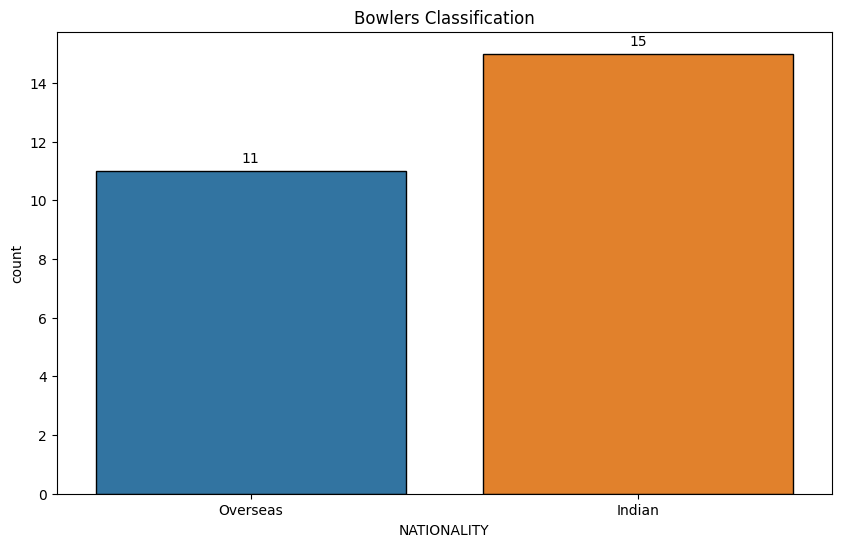

In [38]:
plt.figure(figsize=(10, 6))
plt.title("Bowlers Classification")
ax=sns.countplot(x='NATIONALITY',data=bowl,edgecolor='black')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()

In [39]:
wk=buys[buys['TYPE']=='Wicket-Keeper']
wk

,PLAYERS,NATIONALITY,TYPE,PRICE PAID,TEAM
0,Avanish Rao Aravelly,Indian,Wicket-Keeper,2000000,CSK
6,Ricky Bhui,Indian,Wicket-Keeper,2000000,DC
10,Shai Hope,Overseas,Wicket-Keeper,7500000,DC
12,Kumar Kushagra,Indian,Wicket-Keeper,72000000,DC
13,Tristan Stubbs,Overseas,Wicket-Keeper,5000000,DC
18,Robin Minz,Indian,Wicket-Keeper,36000000,GT
30,K.S. Bharat,Indian,Wicket-Keeper,5000000,KKR
59,Tom Kohler-Cadmore,Overseas,Wicket-Keeper,4000000,RR


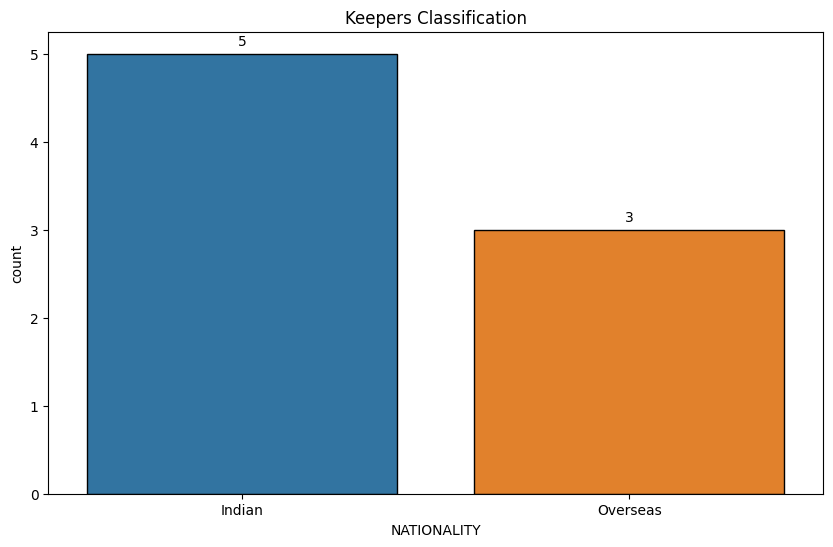

In [40]:
plt.figure(figsize=(10, 6))
plt.title("Keepers Classification")
ax=sns.countplot(x='NATIONALITY',data=wk,edgecolor='black')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()

In [41]:
AR=buys[buys['TYPE']=='All-Rounder']
AR

,PLAYERS,NATIONALITY,TYPE,PRICE PAID,TEAM
2,Daryl Mitchell,Overseas,All-Rounder,140000000,CSK
4,Rachin Ravindra,Overseas,All-Rounder,18000000,CSK
5,Shardul Thakur,Indian,All-Rounder,40000000,CSK
7,Sumit Kumar,Indian,All-Rounder,10000000,DC
20,Azmatullah Omarzai,Overseas,All-Rounder,5000000,GT
21,Shahrukh Khan,Indian,All-Rounder,74000000,GT
29,Ramandeep Singh,Indian,All-Rounder,2000000,KKR
34,David Willey,Overseas,All-Rounder,20000000,LSG
37,Arshin Kulkarni,Indian,All-Rounder,2000000,LSG
38,Mohd. Arshad Khan,Indian,All-Rounder,2000000,LSG


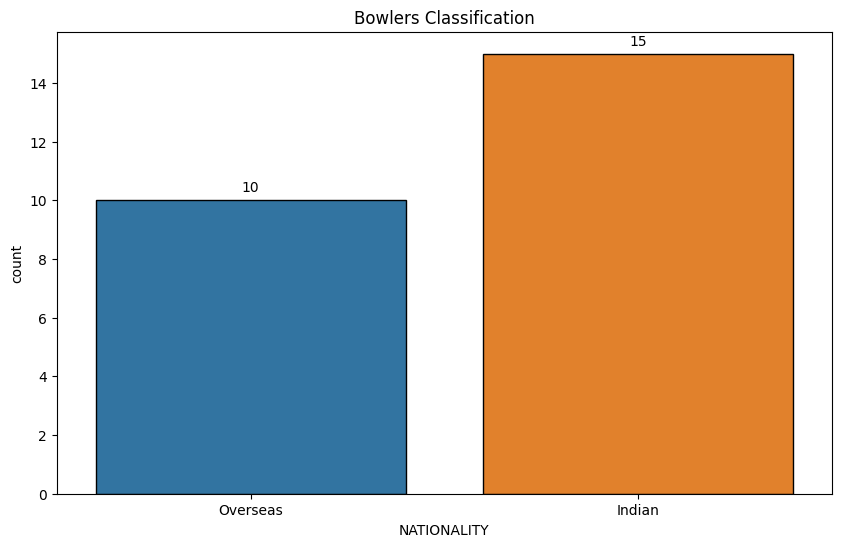

In [42]:
plt.figure(figsize=(10, 6))
plt.title("Bowlers Classification")
ax=sns.countplot(x='NATIONALITY',data=AR,edgecolor='black')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()

In [43]:
Indian_Earnings,Overseas_Earnings=list(buys.groupby('NATIONALITY')['PRICE PAID'].sum())

print((((Overseas_Earnings-Indian_Earnings)/Overseas_Earnings)*100))

47.3841059602649


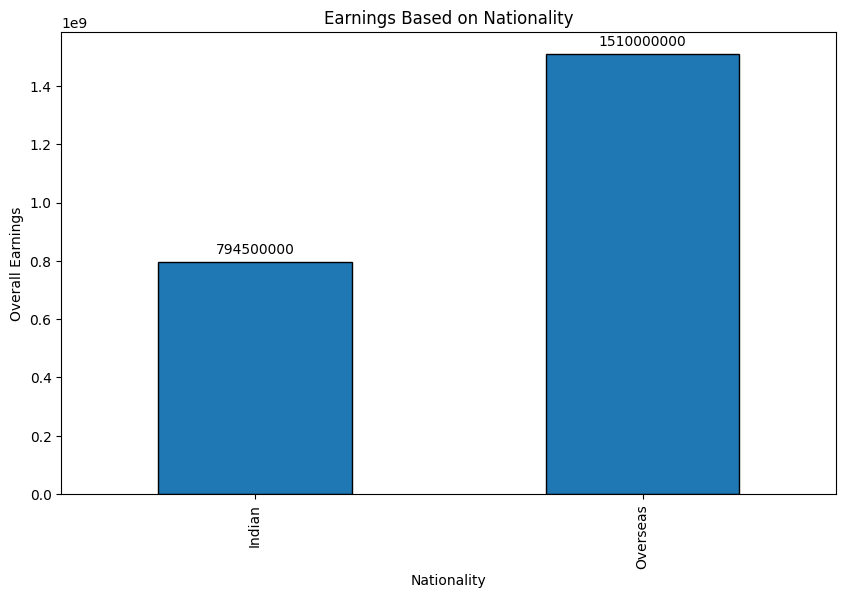

In [44]:
plt.figure(figsize=(10,6))
plt.title("Earnings Based on Nationality")
ax=buys.groupby('NATIONALITY')['PRICE PAID'].sum().plot(kind='bar',edgecolor='black')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Nationality")
plt.ylabel("Overall Earnings")
plt.show()

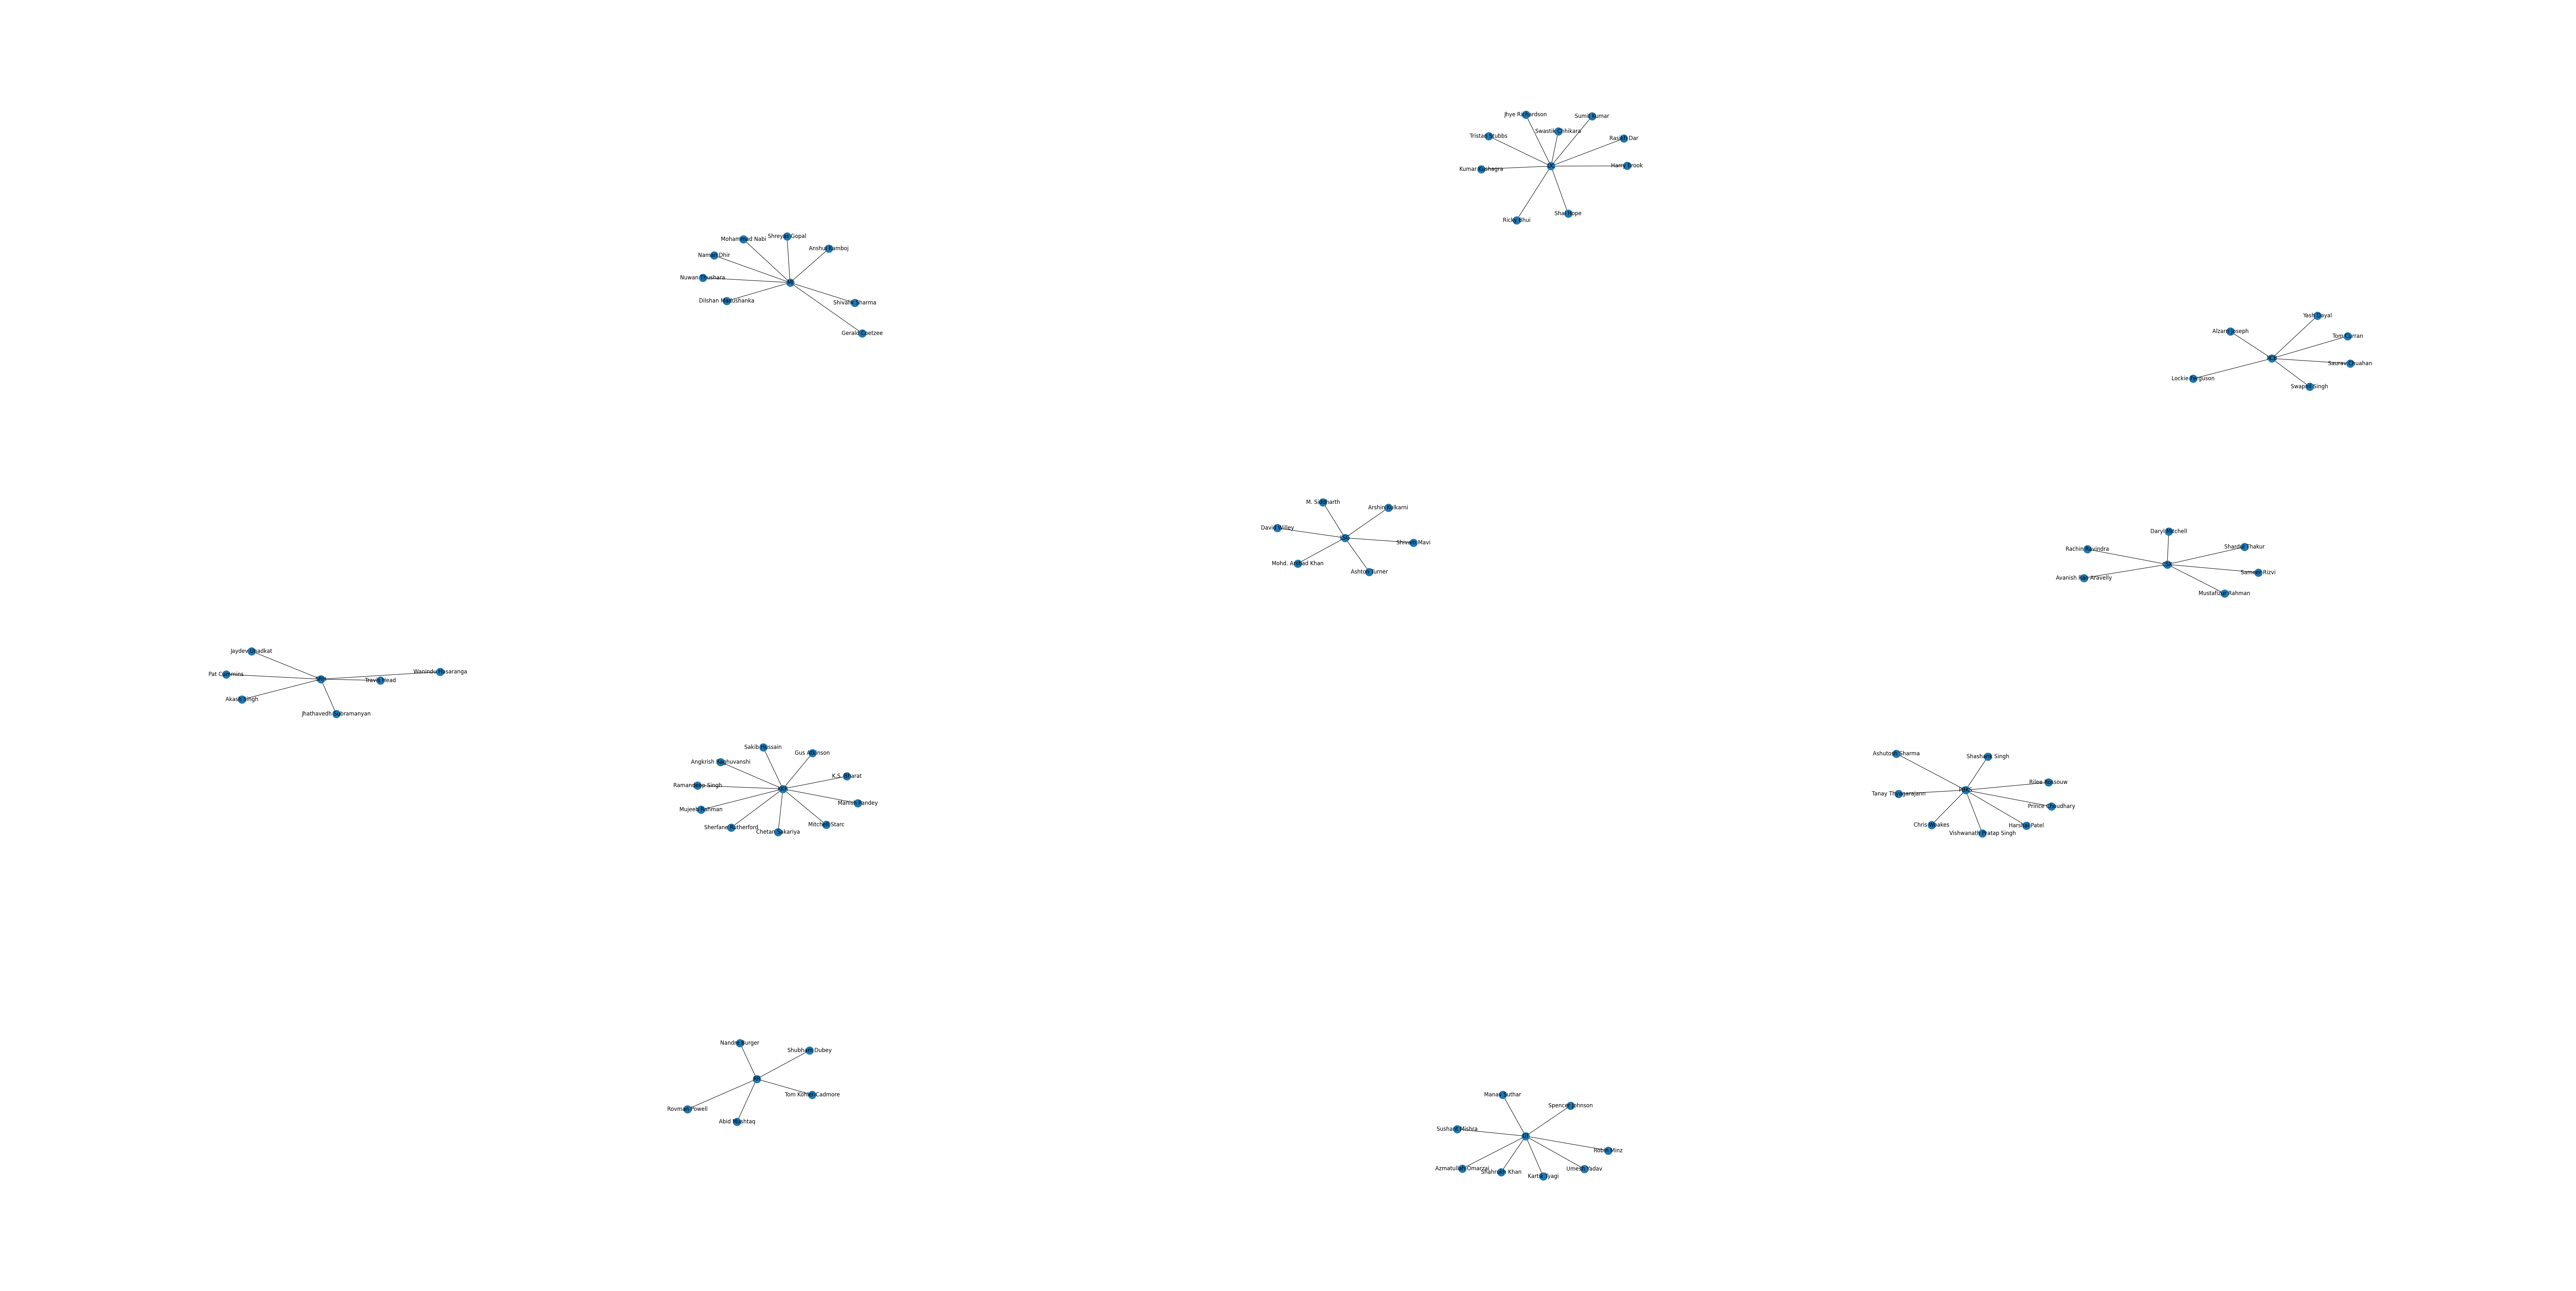

In [45]:
edges = list(zip(buys['TEAM'], buys['PLAYERS']))


import networkx as nx
G = nx.Graph()
G.add_edges_from(edges)

plt.figure(figsize=(80, 40))
nx.draw(G, with_labels=True)

**Unsold Players Exploratory Data Analysis**

In [46]:
unsold=pd.read_csv('/kaggle/input/ipl-2024-auction-data/UNSOLD_PLAYERS.csv')

In [47]:
unsold.head()

,PLAYER,NATIONALITY,TYPE,BASE PRICE
0,Priyansh Arya,Indian,Batter,2000000
1,Rohan Kunnummal,Indian,Batter,2000000
2,Manan Vohra,Indian,Batter,2000000
3,Raj Angad Bawa,Indian,All-Rounder,2000000
4,Sarfaraz Khan,Indian,All-Rounder,2000000


In [48]:
unsold.tail()

,PLAYER,NATIONALITY,TYPE,BASE PRICE
255,Kamlesh Nagarkoti,Indian,All-Rounder,3000000
256,Basil Thampi,Indian,Bowler,3000000
257,Lalit Yadav,Indian,Bowler,3000000
258,S Midhun,Indian,Bowler,3000000
259,Izharulhuq Naveed,Overseas,Bowler,3000000


In [49]:
unsold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PLAYER       260 non-null    object
 1   NATIONALITY  260 non-null    object
 2   TYPE         260 non-null    object
 3   BASE PRICE   260 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 8.2+ KB


In [50]:
unsold.describe()

,BASE PRICE
count,2.600000e+02
mean,4.025000e+06
std,4.145560e+06
min,2.000000e+06
25%,2.000000e+06
50%,2.000000e+06
75%,5.000000e+06
max,2.000000e+07


In [51]:
unsold.isnull().sum()

PLAYER         0
NATIONALITY    0
TYPE           0
BASE PRICE     0
dtype: int64

In [52]:
unsold.columns

Index(['PLAYER', 'NATIONALITY', 'TYPE', 'BASE PRICE'], dtype='object')

In [53]:
unsold['TYPE'].unique()

array(['Batter', 'All-Rounder', 'Wicket-Keeper', 'Bowler'], dtype=object)

In [54]:
unsold['BASE PRICE'].unique()

array([ 2000000, 20000000, 15000000, 10000000,  7500000,  5000000,
        4000000,  3000000])

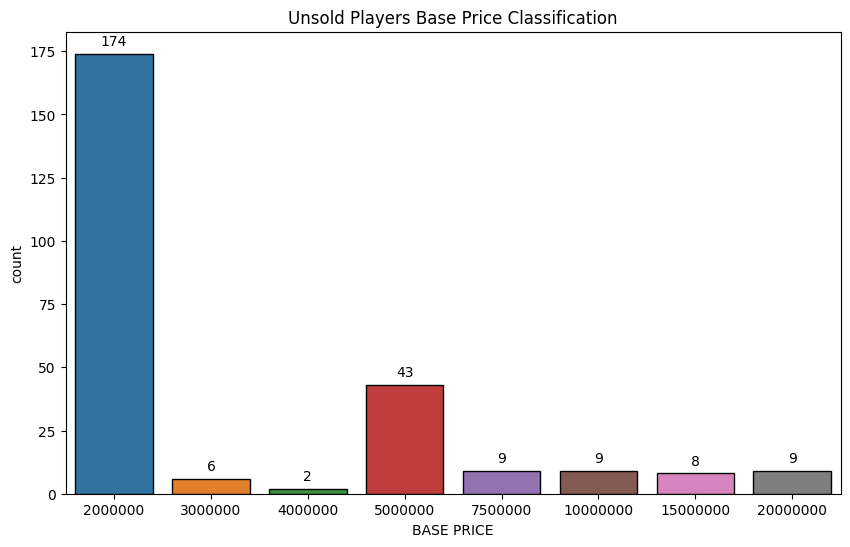

In [55]:
plt.figure(figsize=(10, 6))
plt.title("Unsold Players Base Price Classification")
ax=sns.countplot(x='BASE PRICE',data=unsold,edgecolor='black')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()

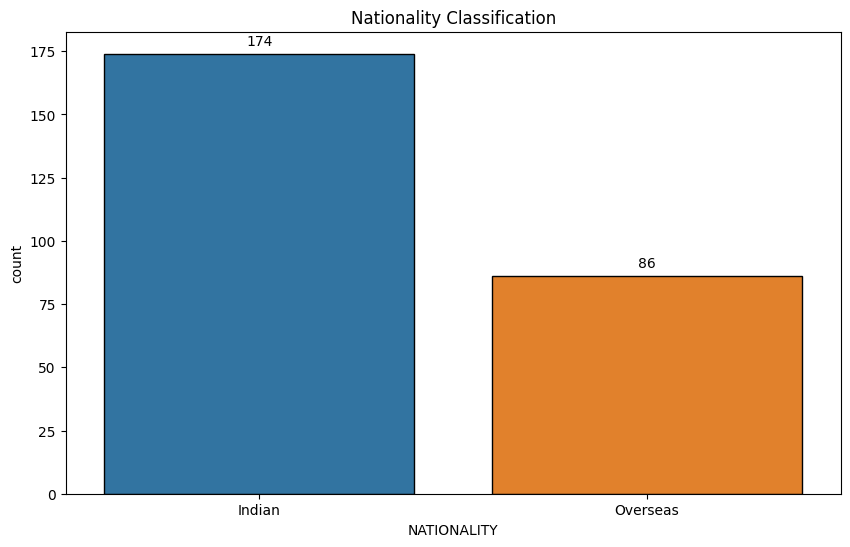

In [56]:
plt.figure(figsize=(10, 6))
plt.title("Nationality Classification")
ax=sns.countplot(x='NATIONALITY',data=unsold,edgecolor='black')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()

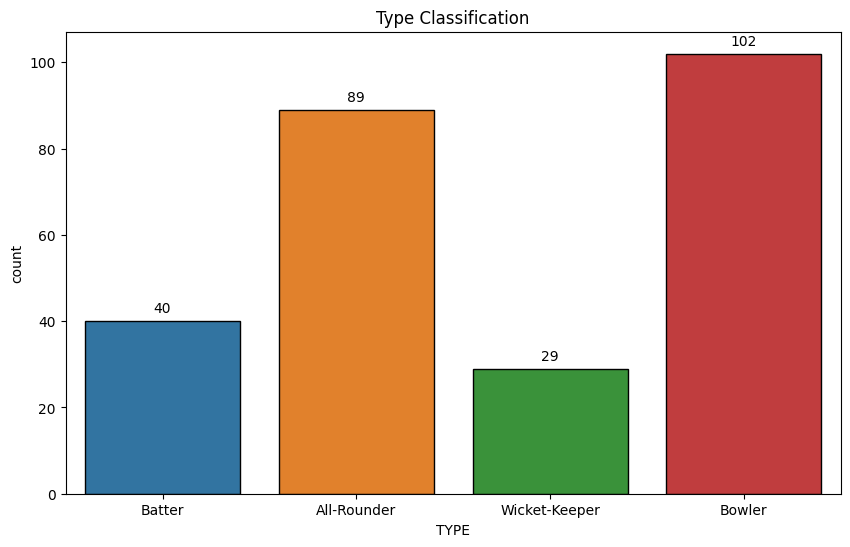

In [57]:
plt.figure(figsize=(10, 6))
plt.title("Type Classification")
ax=sns.countplot(x='TYPE',data=unsold,edgecolor='black')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()

In [58]:
unsold[unsold['BASE PRICE']==20000000]

,PLAYER,NATIONALITY,TYPE,BASE PRICE
174,Steve Smith,Overseas,Batter,20000000
175,Josh Inglis,Overseas,Wicket-Keeper,20000000
176,Josh Hazlewood,Overseas,Bowler,20000000
177,Adil Rashid,Overseas,Bowler,20000000
178,Rassie Van Der Dussen,Overseas,Batter,20000000
179,James Vince,Overseas,Batter,20000000
180,Sean Abbott,Overseas,All-Rounder,20000000
181,Jamie Overton,Overseas,All-Rounder,20000000
182,Ben Duckett,Overseas,Wicket-Keeper,20000000


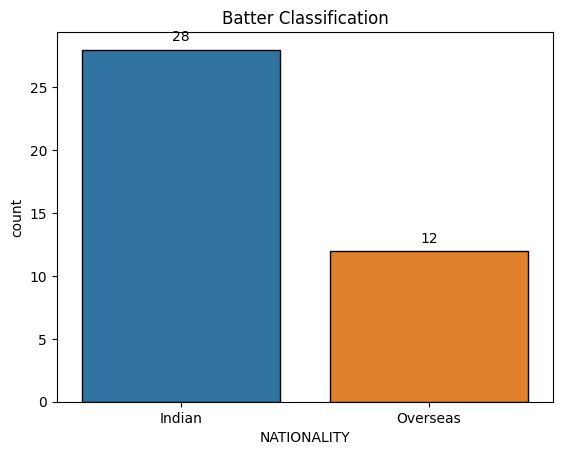

In [59]:
bat=unsold[unsold['TYPE']=='Batter']
plt.title("Batter Classification")
ax=sns.countplot(x='NATIONALITY',data=bat,edgecolor='black')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()

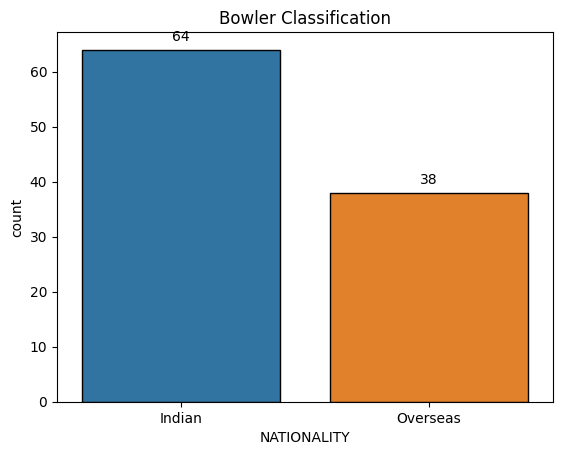

In [60]:
bowler=unsold[unsold['TYPE']=='Bowler']
plt.title("Bowler Classification")
ax=sns.countplot(x='NATIONALITY',data=bowler,edgecolor='black')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()

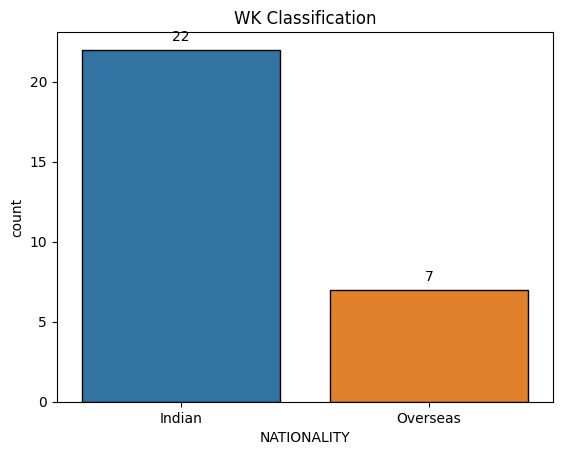

In [61]:
WK=unsold[unsold['TYPE']=='Wicket-Keeper']
WK
plt.title("WK Classification")
ax=sns.countplot(x='NATIONALITY',data=WK,edgecolor='black')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()

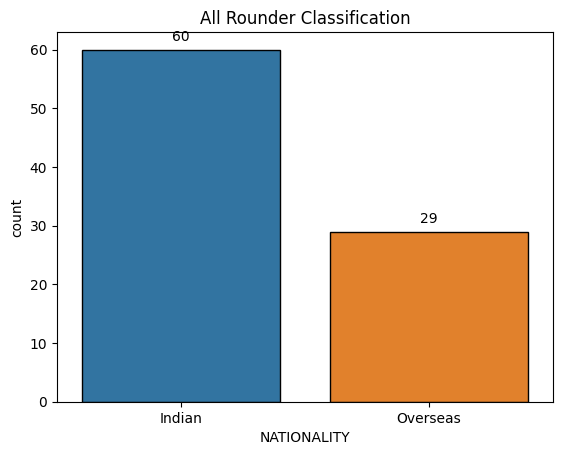

In [62]:
Al=unsold[unsold['TYPE']=='All-Rounder']
plt.title("All Rounder Classification")
ax=sns.countplot(x='NATIONALITY',data=Al,edgecolor='black')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()